In [131]:
import rebound
import numpy as np
import matplotlib.pyplot as plt



#Define the rebound simulation
sim1 = rebound.Simulation()

#Define the masses and mass ratios of the system
m1 = 1
m2 = 0.6
m3 = 1/1047
m = m1 + m2
M = m + m3
eta = m1*m2/m**2
eta3 = m*m3/M**2
inner_a = 1
outer_A = 10


donezo = []
#Define the initial orbit elements of the inner binary
for i in range(4):
    for j in range(6):
        for k in range(2):
            for l in range(2):
                for n in range(5):
                    sim1 = rebound.Simulation()
                    inner_e = 0.1 + 0.1*i
                    inner_w = (0+180*k)*np.pi/180
                    inner_Omega = 0
                    inner_f = 0

                    outer_E = 0.1 + 0.1*j
                    outer_w3 = (0+180*l)*np.pi/180
                    outer_Omega3 = np.pi
                    outer_f = 250

                    z = (10+20*n)*np.pi/180 

                    Jb = m*eta*(m*inner_a*(1-inner_e**2))**0.5
                    J3 = M*eta3*(M*outer_A*(1-outer_E**2))**0.5
                    beta = Jb/J3

                    outer_i3 = np.arctan(((beta**-1 + np.cos(z))/np.sin(z))**-1)
                    inner_i =  np.arctan(((beta + np.cos(z))/np.sin(z))**-1) 

                    sim1.add(m=m1)                
                    sim1.add(m=m2, a=inner_a, e=inner_e, inc=inner_i,  omega=inner_w,
                             Omega=inner_Omega,f = inner_f*np.pi/180)
                    sim1.add(m=m3, a=outer_A, e=outer_E, inc=outer_i3, omega=outer_w3,
                             Omega=outer_Omega3,f = outer_f*np.pi/180)
                    sim1.move_to_com()

                    Pratio = sim1.particles[2].P/sim1.particles[1].P
                    innerP = sim1.particles[1].P
                    tf = 100000*sim1.particles[1].P
                    
                    max_a = float(sim1.particles[1].a)
                    max_A = float(sim1.particles[2].a)
                    min_a = float(sim1.particles[1].a)
                    min_A = float(sim1.particles[2].a)
                    
                    while sim1.t < tf:
                        sim1.steps(1000)
                        if sim1.particles[1].a > max_a:
                            max_a = sim1.particles[1].a
                        if sim1.particles[2].a > max_A:
                            max_A = sim1.particles[2].a
                        if sim1.particles[1].a < min_a:
                            min_a = sim1.particles[1].a
                        if sim1.particles[2].a < min_A:
                            min_A = sim1.particles[2].a
                    donezo.append([(max_a-min_a),(max_A-min_A),inner_a,outer_A,inner_e,outer_E,inner_w*180/np.pi,outer_w3*180/np.pi,z*180/np.pi,m1,m2,m3,100000])
donezonp = np.array(donezo)
print("done")

done


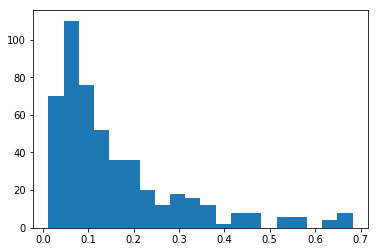

In [102]:
plt.hist(donezonp[:,1],bins=20)
plt.show()

In [133]:
donezonp.astype('float32').tofile('donezo3.dat')

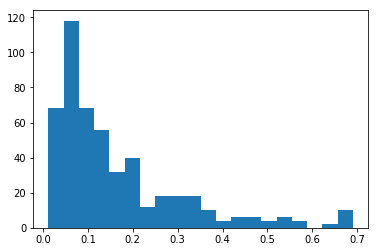

In [110]:
plt.hist(donezonp[:,1],bins=20)
plt.show()

In [135]:
(np.sort(donezonp[:,1]))

array([1.25293187e-02, 1.25293187e-02, 1.31050829e-02, 1.31050829e-02,
       1.74827824e-02, 1.74827824e-02, 1.78162616e-02, 1.78162616e-02,
       1.82861692e-02, 1.82861692e-02, 1.95399809e-02, 1.95399809e-02,
       2.29254745e-02, 2.29254745e-02, 2.37781594e-02, 2.37781594e-02,
       2.45564478e-02, 2.45564478e-02, 2.54515817e-02, 2.54515817e-02,
       2.67722631e-02, 2.67722631e-02, 2.74905019e-02, 2.74905019e-02,
       2.85439056e-02, 2.85439056e-02, 3.00077175e-02, 3.00077175e-02,
       3.06846518e-02, 3.06846518e-02, 3.12353829e-02, 3.12353829e-02,
       3.24215637e-02, 3.24215637e-02, 3.34355554e-02, 3.34355554e-02,
       3.57117177e-02, 3.57117177e-02, 3.57374933e-02, 3.57374933e-02,
       3.65546206e-02, 3.65546206e-02, 3.78732485e-02, 3.78732485e-02,
       3.80249647e-02, 3.80249647e-02, 3.95956286e-02, 3.95956286e-02,
       4.02895822e-02, 4.02895822e-02, 4.13917399e-02, 4.13917399e-02,
       4.19910835e-02, 4.19910835e-02, 4.20941301e-02, 4.20941301e-02,
      

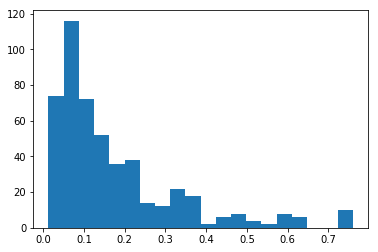

In [125]:
plt.hist(donezonp[:,1],bins=20)
plt.show()

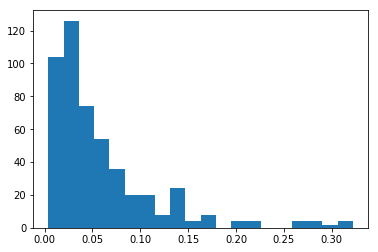

In [127]:
plt.hist(donezonp[:,1],bins=20)
plt.show()

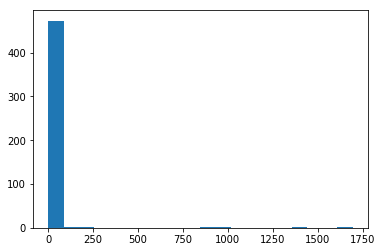

In [129]:
plt.hist(donezonp[:,1],bins=20)
plt.show()

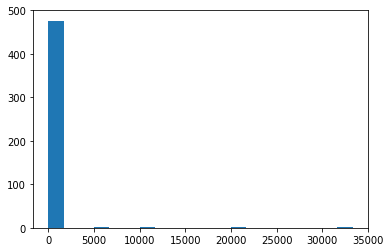

In [132]:
plt.hist(donezonp[:,1],bins=20)
plt.show()